### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth

from sklearn.model_selection import train_test_split

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA


from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("ht_user_metrics_lab.csv")

In [3]:
df

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,sum_workout_minutes,sum_steps
0,82.022452,143.725926,23.189145,22.858703,2040.344935,1873150.0
1,67.904437,166.576626,27.886776,28.467112,1887.737801,1877722.0
2,60.160399,142.101363,33.371695,33.243936,1733.816177,1857852.0
3,60.083408,110.178057,24.292453,32.706852,10690.001585,4454593.0
4,60.307600,118.521362,27.434314,31.717071,13751.448728,3831590.0
...,...,...,...,...,...,...
2995,52.602390,103.480785,15.872020,34.954400,15151.816819,5252259.0
2996,49.265704,101.471865,21.858702,43.027424,17253.922274,4097018.0
2997,52.548398,104.017806,17.362728,34.857315,14710.980769,5263706.0
2998,66.838139,124.422067,29.556272,28.854997,12401.947415,2571739.0


In [4]:
df.shape

(3000, 6)

In [5]:
X = df.iloc[:,0:6]

In [6]:
X.values

array([[     82.02245243,     143.72592567,      23.18914466,
             22.85870309,    2040.34493522, 1873150.        ],
       [     67.90443675,     166.57662587,      27.88677623,
             28.46711168,    1887.7378011 , 1877722.        ],
       [     60.16039919,     142.10136331,      33.37169495,
             33.24393618,    1733.81617652, 1857852.        ],
       ...,
       [     52.54839793,     104.01780614,      17.36272816,
             34.85731547,   14710.98076897, 5263706.        ],
       [     66.83813897,     124.42206724,      29.55627198,
             28.85499658,   12401.94741452, 2571739.        ],
       [     87.41776697,     154.11961382,      23.1733531 ,
             19.75171265,   13833.18530696, 2585590.        ]])

In [7]:
X_train, X_test = train_test_split(X, test_size=0.15, random_state=0)

In [8]:
X_train.shape

(2550, 6)

In [9]:
X_test.shape

(450, 6)

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_train_scaled

array([[-0.6433418 , -0.1963515 , -0.32300311,  0.94818512, -0.27275456,
         0.8667805 ],
       [-0.1772512 , -0.26446887,  0.56655393,  0.10830798, -0.62968479,
         0.56941631],
       [-0.90620244, -1.31867419, -0.86280853,  1.02439216,  0.13985121,
         1.14847496],
       ...,
       [ 0.14522437,  0.04616649,  1.61674149, -0.35582631, -0.03024732,
        -0.02882114],
       [ 0.08321771,  1.25626086,  1.53523109,  0.0303332 , -0.07800415,
        -1.08265239],
       [ 1.1207429 ,  2.28398527,  0.17014982, -1.09189599, -2.43350194,
        -1.72700819]])

## K-Means Clustering

In [13]:
wcss = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

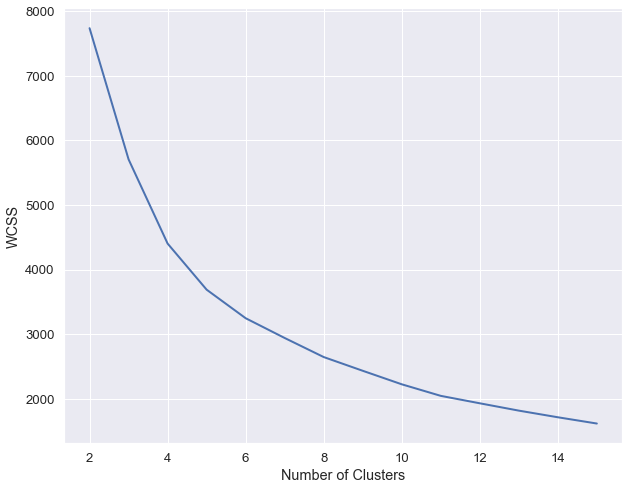

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(2,16),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
list(wcss)

[7738.1556283445725,
 5706.053877092074,
 4401.9786350362465,
 3687.9460439787727,
 3245.7892059041305,
 2939.559325371289,
 2644.216286474843,
 2431.707324227835,
 2222.2801478280826,
 2043.1878398177935,
 1928.0019472049025,
 1814.4644470891642,
 1711.574881772845,
 1614.4448560992976]

In [16]:
list(range(2,16))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [17]:
list(zip(wcss,range(2,16)))

[(7738.1556283445725, 2),
 (5706.053877092074, 3),
 (4401.9786350362465, 4),
 (3687.9460439787727, 5),
 (3245.7892059041305, 6),
 (2939.559325371289, 7),
 (2644.216286474843, 8),
 (2431.707324227835, 9),
 (2222.2801478280826, 10),
 (2043.1878398177935, 11),
 (1928.0019472049025, 12),
 (1814.4644470891642, 13),
 (1711.574881772845, 14),
 (1614.4448560992976, 15)]

### Execute K-Means after determining the suitable cluster

In [18]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)

In [19]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=4, random_state=0)

### Results

In [20]:
kmeans.cluster_centers_

array([[ 1.35030463,  1.44900216,  0.17828794, -1.24091853, -2.42294921,
        -1.70695406],
       [-0.81614785, -0.8254188 , -0.65451019,  0.82675147,  0.40663422,
         0.85439623],
       [ 1.52890548,  1.06771349, -0.05022419, -1.38462608,  0.36881251,
        -0.95485935],
       [-0.00435906,  0.22402842,  0.99307941, -0.12739085, -0.00363351,
        -0.24148056]])

In [21]:
df_segm_kmeans = X_train.copy()

In [22]:
df_segm_kmeans

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,sum_workout_minutes,sum_steps
422,54.164954,116.524269,21.385004,39.048600,11816.401844,4683371.0
838,60.025780,115.374273,25.409382,33.135436,10200.220912,4360250.0
1735,50.859631,97.576582,18.942911,39.585137,13684.681753,4989465.0
746,83.270297,134.222479,19.168630,21.812239,2312.722489,1892719.0
900,50.530177,105.024803,20.894067,41.399267,17347.711054,4072290.0
...,...,...,...,...,...,...
763,90.113362,144.578567,21.432304,18.346046,14767.589386,2595413.0
835,81.907737,148.378812,21.598411,22.797690,2130.923951,1881170.0
1653,64.080728,120.618595,30.160456,29.867693,12914.475198,3710195.0
2607,63.301029,141.048094,29.791701,32.586453,12698.232172,2565084.0


In [23]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [24]:
df_segm_kmeans

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,sum_workout_minutes,sum_steps,Segment K-Means
422,54.164954,116.524269,21.385004,39.048600,11816.401844,4683371.0,1
838,60.025780,115.374273,25.409382,33.135436,10200.220912,4360250.0,3
1735,50.859631,97.576582,18.942911,39.585137,13684.681753,4989465.0,1
746,83.270297,134.222479,19.168630,21.812239,2312.722489,1892719.0,0
900,50.530177,105.024803,20.894067,41.399267,17347.711054,4072290.0,1
...,...,...,...,...,...,...,...
763,90.113362,144.578567,21.432304,18.346046,14767.589386,2595413.0,2
835,81.907737,148.378812,21.598411,22.797690,2130.923951,1881170.0,0
1653,64.080728,120.618595,30.160456,29.867693,12914.475198,3710195.0,3
2607,63.301029,141.048094,29.791701,32.586453,12698.232172,2565084.0,3


In [25]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [26]:
df_segm_analysis

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,sum_workout_minutes,sum_steps
Segment K-Means,,,,,,
0,79.233930,144.302062,23.652857,23.636191,2080.315257,1.886707e+06
1,51.984294,105.882318,19.879688,38.201672,14895.116635,4.670586e+06
2,81.479734,137.864931,22.619062,22.624417,14721.419078,2.703946e+06
3,62.184317,123.607423,27.327580,31.481583,13036.182352,3.481280e+06


In [27]:
df_segm_kmeans["Segment K-Means"].value_counts()

1    1158
3     741
2     397
0     254
Name: Segment K-Means, dtype: int64

In [28]:
df_segm_kmeans.groupby("Segment K-Means")['sum_steps'].mean()

Segment K-Means
0    1.886707e+06
1    4.670586e+06
2    2.703946e+06
3    3.481280e+06
Name: sum_steps, dtype: float64

In [29]:
df_segm_analysis.rename({0: 'A',
                         1: 'B',
                         2: 'C',
                         3: 'D'},inplace=True)

In [30]:
df_segm_analysis

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,sum_workout_minutes,sum_steps
Segment K-Means,,,,,,
A,79.233930,144.302062,23.652857,23.636191,2080.315257,1.886707e+06
B,51.984294,105.882318,19.879688,38.201672,14895.116635,4.670586e+06
C,81.479734,137.864931,22.619062,22.624417,14721.419078,2.703946e+06
D,62.184317,123.607423,27.327580,31.481583,13036.182352,3.481280e+06


In [31]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C',
                                                                  3: 'D'})

In [32]:
df_segm_kmeans

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,sum_workout_minutes,sum_steps,Segment K-Means,Labels
422,54.164954,116.524269,21.385004,39.048600,11816.401844,4683371.0,1,B
838,60.025780,115.374273,25.409382,33.135436,10200.220912,4360250.0,3,D
1735,50.859631,97.576582,18.942911,39.585137,13684.681753,4989465.0,1,B
746,83.270297,134.222479,19.168630,21.812239,2312.722489,1892719.0,0,A
900,50.530177,105.024803,20.894067,41.399267,17347.711054,4072290.0,1,B
...,...,...,...,...,...,...,...,...
763,90.113362,144.578567,21.432304,18.346046,14767.589386,2595413.0,2,C
835,81.907737,148.378812,21.598411,22.797690,2130.923951,1881170.0,0,A
1653,64.080728,120.618595,30.160456,29.867693,12914.475198,3710195.0,3,D
2607,63.301029,141.048094,29.791701,32.586453,12698.232172,2565084.0,3,D


### Plot the clusters

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


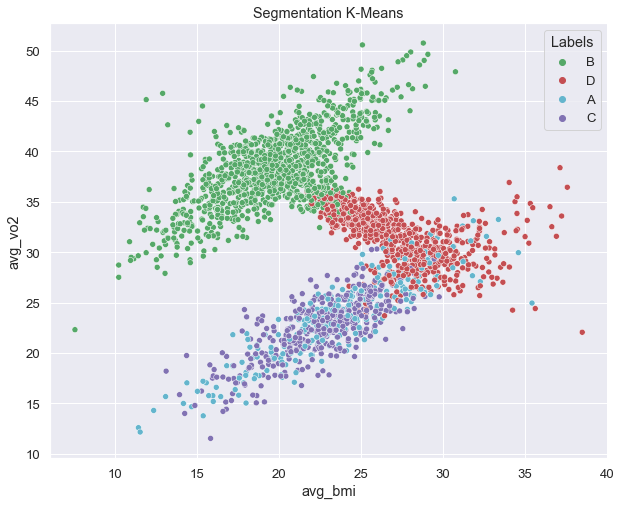

In [33]:
x_axis = df_segm_kmeans['avg_bmi']
y_axis = df_segm_kmeans['avg_vo2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation K-Means')
plt.show()

## Principal Component Analysis

In [34]:
df2 = pd.read_csv("ht_user_metrics_pca_lab.csv")

In [35]:
df2

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,min_active_heartrate,avg_active_heartrate,max_active_heartrate,min_bmi,avg_bmi,max_bmi,min_vo2,avg_vo2,max_vo2,min_workout_minutes,avg_workout_minutes,max_workout_minutes,min_steps,avg_steps,max_steps,as_x_aah,bmi_change,steps_change,workout_minutes_change,var_workout_minutes,var_steps
0,100.121903,82.683797,99.138281,120.307791,139.434875,162.347827,19.530816,22.398064,24.997081,20.283341,20.994012,21.491176,1.046930,5.502632,9.325750,2539,5171.495890,7837,7.210869e+05,5.466266,5298.0,8.278820,1.904237,6.279071e+05
1,52.712876,77.732942,97.937731,109.049387,127.057153,146.869868,22.635269,25.150813,27.933614,24.929151,25.527475,26.231702,12.109056,37.216702,66.115919,10027,7115.591781,9611,9.040868e+05,5.298346,-416.0,54.006862,82.918618,1.316762e+06
2,100.373661,86.511629,99.789336,129.551728,147.315731,177.783150,16.844741,19.148256,21.339665,18.817131,19.448407,19.946847,10.524606,45.000087,84.725056,10822,7257.693151,9909,1.069172e+06,4.494924,-913.0,74.200450,137.295072,1.336600e+06
3,58.418806,77.550541,98.875329,110.845517,129.577004,146.738650,21.335820,24.240376,26.909150,20.705860,21.401302,22.088526,11.402530,37.886069,68.119525,10014,7129.690411,9864,9.238439e+05,5.573329,-150.0,56.716994,90.699736,1.212805e+06
4,49.816891,68.933106,92.686789,116.688942,136.502687,162.363830,27.486036,30.726596,33.872173,28.102425,28.855230,29.765288,11.659989,32.241984,60.513742,10317,6958.378082,9766,9.498373e+05,6.386137,-551.0,48.853753,70.656332,1.095015e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,100.477154,82.056086,98.814556,122.210337,140.614679,164.254190,18.916956,21.432227,23.856435,23.440035,24.162064,24.938936,10.368677,41.550757,77.061639,10032,7283.430137,9987,1.024157e+06,4.939479,-45.0,66.692962,105.680187,1.314433e+06
2996,100.020278,90.113362,99.805027,118.006237,144.578567,164.659186,18.877848,21.432304,24.417927,17.709768,18.346046,18.941193,11.256013,40.459149,71.493511,10028,7110.720548,9670,1.028058e+06,5.540079,-358.0,60.237497,96.136487,1.156895e+06
2997,102.149087,81.907737,99.971408,129.293432,148.378812,168.128114,19.169454,21.598411,24.616552,21.939059,22.797690,23.523448,1.998609,5.838148,9.966548,2351,5153.890411,7431,7.647281e+05,5.447098,5080.0,7.967938,2.021952,5.640107e+05
2998,53.335093,69.910868,91.672607,114.039369,140.814891,159.875604,22.352269,26.134180,29.000842,26.250604,26.965661,27.625202,1.353740,5.176265,9.120217,3212,5167.194521,7199,7.276179e+05,6.648573,3987.0,7.766478,1.650549,5.608619e+05


In [36]:
df2.shape

(3000, 24)

In [37]:
scaler = StandardScaler()

In [38]:
df2_scaled = scaler.fit_transform(df2)

In [39]:
df2_scaled

array([[ 2.30776551,  1.63083817,  1.61818232, ..., -0.95121979,
        -0.9942609 , -1.20153642],
       [ 0.26372841,  1.23538471,  1.50639547, ...,  0.15042944,
        -0.74668174, -1.07800393],
       [ 2.31862003,  1.93658925,  1.67880407, ...,  0.63691976,
        -0.58050782, -1.07444648],
       ...,
       [ 2.39516741,  1.56884974,  1.69575728, ..., -0.95870934,
        -0.99390116, -1.21299496],
       [ 0.29055527,  0.61059038,  0.92303065, ..., -0.9635628 ,
        -0.99503617, -1.21355963],
       [ 2.30516996,  2.85280232,  1.68521579, ..., -1.26768217,
        -0.45863126, -1.05536789]])

In [40]:
PCAinst = PCA(random_state=0)

In [41]:
PCAinst.fit(df2_scaled)

PCA(random_state=0)

In [42]:
PCAinst.n_components_

24

In [43]:
PCAinst.explained_variance_ratio_

array([0.49769441, 0.16846754, 0.12374382, 0.0700191 , 0.0396243 ,
       0.02818964, 0.01704531, 0.01518461, 0.00976539, 0.00745991,
       0.00642375, 0.00498245, 0.00406836, 0.00355269, 0.00186042,
       0.00103688, 0.00073693, 0.00008665, 0.00004079, 0.00001294,
       0.0000041 , 0.        , 0.        , 0.        ])

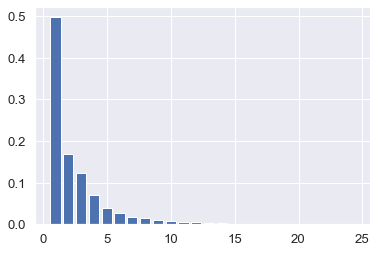

In [44]:
plt.bar(range(1, 25), PCAinst.explained_variance_ratio_)
plt.show()

In [45]:
PCAinst.explained_variance_ratio_[0]

0.497694409763988

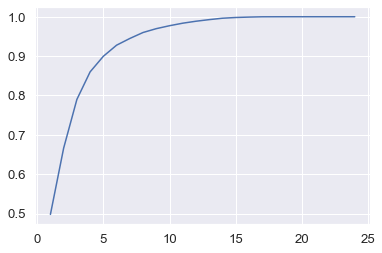

In [46]:
plt.plot(range(1, 25), np.cumsum(PCAinst.explained_variance_ratio_))
plt.show()

In [47]:
loadings =PCAinst.components_.T * np.sqrt(PCAinst.explained_variance_)
loadings

array([[ 0.7794632 ,  0.43414445, -0.03600145,  0.13732009, -0.09737232,
        -0.14252435, -0.14752196,  0.03098953,  0.26994908,  0.18632875,
        -0.08531994,  0.01626967,  0.00786458,  0.11878972,  0.03374222,
         0.03206422, -0.01199987,  0.00001277,  0.00004289, -0.00001347,
         0.00000835,  0.        , -0.        , -0.        ],
       [ 0.89123946,  0.35598212, -0.10956333,  0.10062279, -0.1094652 ,
        -0.11887383, -0.03577437,  0.01427054,  0.07649627,  0.04171176,
        -0.01863081, -0.00363813, -0.01125074, -0.05674626, -0.0388475 ,
        -0.11140101,  0.06601567,  0.00028339,  0.00043108,  0.00002819,
        -0.00001823, -0.        ,  0.        ,  0.        ],
       [ 0.8943533 ,  0.26398896, -0.1620698 ,  0.06998572, -0.13356783,
        -0.11599145, -0.01147465,  0.01708562,  0.05793983,  0.01462769,
        -0.03778487,  0.01597633, -0.03042271, -0.24099361,  0.01512397,
         0.05566561, -0.01755178, -0.00005341,  0.00001954, -0.00000536,
  

In [48]:
loadings.shape

(24, 24)

In [49]:
component_columns = ["PC" + str(x) for x in range(1, 25)]
loadings_df = pd.DataFrame(loadings, columns=component_columns, index=df2.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
min_resting_heartrate,0.779463,0.434144,-0.036001,0.137320,-0.097372,-0.142524,-0.147522,0.030990,0.269949,0.186329,-0.085320,0.016270,0.007865,0.118790,0.033742,0.032064,-0.012000,0.000013,4.288845e-05,-1.346710e-05,8.354010e-06,2.210897e-31,-9.116894e-32,-1.929750e-32
avg_resting_heartrate,0.891239,0.355982,-0.109563,0.100623,-0.109465,-0.118874,-0.035774,0.014271,0.076496,0.041712,-0.018631,-0.003638,-0.011251,-0.056746,-0.038847,-0.111401,0.066016,0.000283,4.310821e-04,2.818661e-05,-1.823449e-05,-7.168865e-31,1.512267e-31,1.052878e-33
max_resting_heartrate,0.894353,0.263989,-0.162070,0.069986,-0.133568,-0.115991,-0.011475,0.017086,0.057940,0.014628,-0.037785,0.015976,-0.030423,-0.240994,0.015124,0.055666,-0.017552,-0.000053,1.954397e-05,-5.361952e-06,2.518540e-06,2.697688e-31,2.335318e-32,3.403667e-32
min_active_heartrate,0.816978,0.171474,0.005317,-0.054289,-0.073283,0.481038,-0.063095,0.008518,0.047855,0.021294,0.037273,-0.173934,0.150945,-0.018169,-0.044203,0.014355,0.002405,0.000077,-3.690867e-03,4.027332e-07,-7.131563e-06,-1.915986e-32,4.881166e-32,-8.199734e-32
avg_active_heartrate,0.874012,0.144814,-0.174717,-0.087969,-0.110630,0.347192,0.032539,0.020127,-0.036890,-0.028298,-0.038663,-0.071464,-0.157755,0.022787,0.087579,-0.025435,-0.017030,-0.000356,1.340865e-02,6.905039e-05,2.775359e-05,-8.873107e-32,9.372691e-32,2.893023e-32
max_active_heartrate,0.855555,0.097306,-0.170459,-0.068268,-0.070387,0.365423,-0.034928,0.004849,0.003201,-0.038435,0.028340,0.284910,0.036606,0.013478,-0.021305,0.000751,-0.000962,-0.000077,-2.875074e-04,3.792881e-05,1.449876e-06,-5.106938e-32,-9.053088e-33,2.703682e-32
min_bmi,0.427543,-0.795271,-0.378072,-0.063911,-0.074897,-0.036909,0.050607,0.015054,-0.010889,-0.031258,-0.155582,-0.004949,0.047719,0.010430,0.006714,0.002886,0.011401,-0.020176,-3.697211e-06,9.890378e-05,-2.508366e-07,-3.632677e-16,-2.319562e-18,-1.120585e-18
avg_bmi,0.429475,-0.801595,-0.383367,-0.065339,-0.074797,-0.036091,0.051142,0.013352,-0.003883,-0.006168,-0.096826,-0.004497,0.036403,0.008406,0.007934,0.002860,0.008668,0.037530,4.752325e-04,-1.752340e-04,-3.732135e-06,-4.180230e-31,-2.263022e-31,2.544350e-32
max_bmi,0.430350,-0.805000,-0.385545,-0.065733,-0.074879,-0.037229,0.050931,0.011487,0.000292,0.016742,-0.054535,-0.005051,0.026519,0.006848,0.006408,0.002646,0.009059,-0.016198,8.044222e-07,7.834348e-05,-3.825505e-07,4.605848e-16,2.940957e-18,1.420783e-18
min_vo2,-0.847532,-0.398065,0.162465,-0.060043,0.183276,0.164036,-0.117808,-0.017287,0.109849,0.044037,-0.038086,0.012753,-0.029360,-0.045321,0.005573,-0.009768,0.007274,-0.000369,3.637157e-04,-1.280456e-02,3.689827e-03,-1.931353e-31,6.546361e-31,-5.673334e-32


In [50]:
abs(loadings_df["PC1"]).sort_values(ascending=False)

avg_steps                 0.929000
max_resting_heartrate     0.894353
avg_resting_heartrate     0.891239
var_steps                 0.881574
avg_active_heartrate      0.874012
max_active_heartrate      0.855555
avg_vo2                   0.847682
max_vo2                   0.847614
min_vo2                   0.847532
min_active_heartrate      0.816978
as_x_aah                  0.803508
min_resting_heartrate     0.779463
min_steps                 0.663959
max_steps                 0.662415
avg_workout_minutes       0.622555
steps_change              0.618185
var_workout_minutes       0.601186
min_workout_minutes       0.430523
max_bmi                   0.430350
avg_bmi                   0.429475
min_bmi                   0.427543
bmi_change                0.396701
workout_minutes_change    0.380294
max_workout_minutes       0.303061
Name: PC1, dtype: float64

In [51]:
component_df = pd.DataFrame(scaler.transform(df2), columns=component_columns)
component_3_df = component_df.loc[:, ["PC1", "PC2", "PC3"]]
component_3_df

,PC1,PC2,PC3
0,2.307766,1.630838,1.618182
1,0.263728,1.235385,1.506395
2,2.318620,1.936589,1.678804
3,0.509739,1.220815,1.593698
4,0.138868,0.532491,1.017464
...,...,...,...
2995,2.323082,1.580699,1.588039
2996,2.303384,2.224281,1.680265
2997,2.395167,1.568850,1.695757
2998,0.290555,0.610590,0.923031
